# 3.2 (Cont'd) Cross-sectional analysis (2018) 
We continue our cross-sectional regression analysis of international arrivals to Singapore using R. We will apply backward elimination, forward selection and stepwise regression techniques to select variables to construct our regression model. 

In [1]:
#Load the transformed 2018 international arrivals dataset

df_2018 = read.csv("df_2018_model.csv",stringsAsFactors = FALSE)

In [2]:
head(df_2018)

country_code,country,year,visitor_count,total_pop,gdp_per_capita,comm_lang,distw_km,log_visitor_count,log_total_pop,log_gdp_per_capita
AUS,Australia,2018,1107215,24992369,56919.374,1,5893.497,13.91736,17.03408,10.949391
BGD,Bangladesh,2018,126301,161356039,1203.216,0,2874.279,11.74642,18.89912,7.092753
BRN,Brunei Darussalam,2018,74960,428962,31436.949,1,1264.269,11.22471,12.96912,10.355739
CAN,Canada,2018,129512,37058856,51357.754,1,14394.100,11.77153,17.42802,10.846571
CHN,China,2018,3416475,1392730000,7754.962,1,4097.429,15.04412,21.05453,8.956088
DNK,Denmark,2018,37417,5797446,62888.727,0,10051.390,10.52988,15.57293,11.049122


## 3.2.1 Regression models 

### Regression: Backward Elimination 
We begin with backward elimination to construct our multi-variable regression model. This involves starting with all independent variables and eliminating them one at a time if it does not contribute to the regression model. 

For backwards elimination, R uses the Akaike Information Criterion (AIC) as the metric to decide if a variable should be dropped from an existing model. 

In [3]:
#Fit a model with all the independent variables we wish to consider 

backward_model <- lm(log_visitor_count ~ log_gdp_per_capita + log_total_pop + comm_lang + distw_km, data=df_2018)

In [4]:
#Run the backward elimination process to obtain a regression model. 

step(backward_model, direction = "backward")

Start:  AIC=-1.07
log_visitor_count ~ log_gdp_per_capita + log_total_pop + comm_lang + 
    distw_km

                     Df Sum of Sq    RSS    AIC
- comm_lang           1     1.440 30.804 -1.201
<none>                            29.364 -1.068
- log_gdp_per_capita  1    31.982 61.346 25.666
- distw_km            1    37.016 66.380 28.742
- log_total_pop       1    57.378 86.742 39.176

Step:  AIC=-1.2
log_visitor_count ~ log_gdp_per_capita + log_total_pop + distw_km

                     Df Sum of Sq    RSS    AIC
<none>                            30.804 -1.201
- log_gdp_per_capita  1    31.492 62.295 24.265
- distw_km            1    37.887 68.691 28.076
- log_total_pop       1    57.204 88.008 37.741



Call:
lm(formula = log_visitor_count ~ log_gdp_per_capita + log_total_pop + 
    distw_km, data = df_2018)

Coefficients:
       (Intercept)  log_gdp_per_capita       log_total_pop            distw_km  
        -1.205e+01           1.129e+00           8.856e-01          -3.621e-04  


### Regression: Forward Selection
We next apply forward selection to construct our multi-variable regression model and compare it with the one produced by backward elimination. This involves starting with only an intercept before adding more independent variables that contributes to the regression model. 

For forward selection, R uses the Akaike Information Criterion (AIC) as the metric to decide if a variable should be included in an existing model. 

In [5]:
#Fit a model with only an intercept

forward_model = lm(log_visitor_count ~ 1, data=df_2018)

In [6]:
#Run the forward selection process while the defining the independent variables to be considered (see above)

step(forward_model,direction="forward",scope=formula(backward_model))

Start:  AIC=40.18
log_visitor_count ~ 1

                     Df Sum of Sq     RSS    AIC
+ log_total_pop       1    31.869  71.928 27.872
+ distw_km            1    13.917  89.880 36.562
<none>                            103.797 40.176
+ comm_lang           1     2.217 101.581 41.334
+ log_gdp_per_capita  1     2.005 101.793 41.416

Step:  AIC=27.87
log_visitor_count ~ log_total_pop

                     Df Sum of Sq    RSS    AIC
+ distw_km            1    9.6331 62.295 24.265
<none>                            71.928 27.872
+ log_gdp_per_capita  1    3.2378 68.691 28.076
+ comm_lang           1    1.7362 70.192 28.919

Step:  AIC=24.26
log_visitor_count ~ log_total_pop + distw_km

                     Df Sum of Sq    RSS     AIC
+ log_gdp_per_capita  1   31.4915 30.804 -1.2011
<none>                            62.295 24.2646
+ comm_lang           1    0.9493 61.346 25.6658

Step:  AIC=-1.2
log_visitor_count ~ log_total_pop + distw_km + log_gdp_per_capita

            Df Sum of Sq    


Call:
lm(formula = log_visitor_count ~ log_total_pop + distw_km + log_gdp_per_capita, 
    data = df_2018)

Coefficients:
       (Intercept)       log_total_pop            distw_km  log_gdp_per_capita  
        -1.205e+01           8.856e-01          -3.621e-04           1.129e+00  


We note that the same model is obtained from both forward selection and backward elimination. 

### Final model: Stepwise Regression
We will obtain our final model using stepwise regression, which can be seen as a combination of both forward selection and backward elimination. At each step, variables can be added or dropped depending on how each action alters the AIC score. 

In [7]:
final_model = step(forward_model,direction="both",scope=formula(backward_model))

Start:  AIC=40.18
log_visitor_count ~ 1

                     Df Sum of Sq     RSS    AIC
+ log_total_pop       1    31.869  71.928 27.872
+ distw_km            1    13.917  89.880 36.562
<none>                            103.797 40.176
+ comm_lang           1     2.217 101.581 41.334
+ log_gdp_per_capita  1     2.005 101.793 41.416

Step:  AIC=27.87
log_visitor_count ~ log_total_pop

                     Df Sum of Sq     RSS    AIC
+ distw_km            1     9.633  62.295 24.265
<none>                             71.928 27.872
+ log_gdp_per_capita  1     3.238  68.691 28.076
+ comm_lang           1     1.736  70.192 28.919
- log_total_pop       1    31.869 103.797 40.176

Step:  AIC=24.26
log_visitor_count ~ log_total_pop + distw_km

                     Df Sum of Sq    RSS    AIC
+ log_gdp_per_capita  1   31.4915 30.804 -1.201
<none>                            62.295 24.265
+ comm_lang           1    0.9493 61.346 25.666
- distw_km            1    9.6331 71.928 27.872
- log_total_po

We obtain the final model constructed through stepwise regression.

In [8]:
#Obtain a summary of the regression model, such as coefficients, p-values and Adjusted R-squared

summary(final_model)


Call:
lm(formula = log_visitor_count ~ log_total_pop + distw_km + log_gdp_per_capita, 
    data = df_2018)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.60377 -0.32678  0.09842  0.58925  1.40789 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -1.205e+01  3.144e+00  -3.834 0.000504 ***
log_total_pop       8.856e-01  1.099e-01   8.062 1.72e-09 ***
distw_km           -3.621e-04  5.518e-05  -6.561 1.42e-07 ***
log_gdp_per_capita  1.129e+00  1.887e-01   5.982 8.16e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9381 on 35 degrees of freedom
Multiple R-squared:  0.7032,	Adjusted R-squared:  0.6778 
F-statistic: 27.65 on 3 and 35 DF,  p-value: 2.392e-09


## Model interpretation
We can interpret the final stepwise regression model as follows: 

 - Holding all else constant, if Total Population increases by 1%, we expect Total Arrivals to increase by 0.89%
 - Holding all else constant, if Distance from Singapore increases by 1000 km, we expect Total Arrivals to decrease by 36%
 - Holding all else constant, if GDP per capita increases by 1%, we expect Total Arrivals to increase by 1.13%
 - There is evidence to infer that log(population), log(GDP per capita) and distance from Singapore are linearly-related to total arrivals - these coefficients are significant at the 1% level 
 - Conversely, there is insufficient evidence to conclude that sharing a common language is associated with arrival numbers from a foreign country 
 - The model can explain around 67.78% of the variation in international arrivals data 

## 3.2.2 Model diagnostic plots
The section visualises some diagnostic plots for the regression model we constructed. We will be looking at the (1) residuals vs. fitted values plot, (2) Normal Q-Q plot, (3) Spread-location plot and (4) Residuals vs. Leverage plot. These plots can help assess how well/poorly the model represents the given data. 

### Residuals vs. Fitted plot
Residuals represent variations left unexplained by the model. This plot is used to reveal if the residuals have non-linear patterns, which could signal that the existing fitted model has a problem. If the plot has equally spread residuals around a horizontal line without a clear pattern, it is a good indication that a non-linear relationship does not exist. 

In [9]:
library(repr) #Load the repr package to resize plots produced

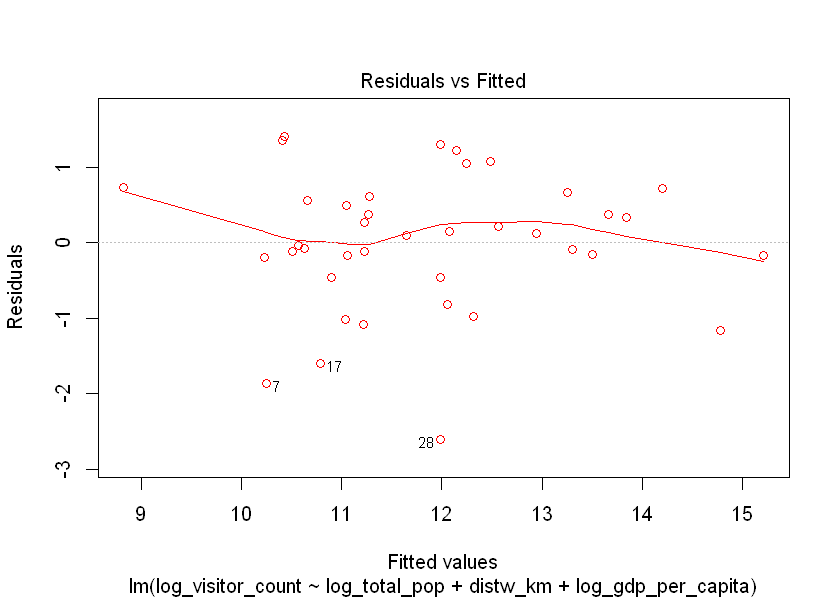

In [10]:
# Residuals vs Fitted Plot

options(repr.plot.width=7, repr.plot.height=5)
plot(final_model, which=1, col=c("red"))

From the diagram, the residuals seem to be randomly scattered around zero with no distinct pattern. This indicates that we do not have non-linear relationships among the variables. 

### Normal Q-Q plot
This plot checks if the residuals are normally distributed. If the residuals adhere closely to the straight line on this plot, it is an indication that they are normally distributed. 

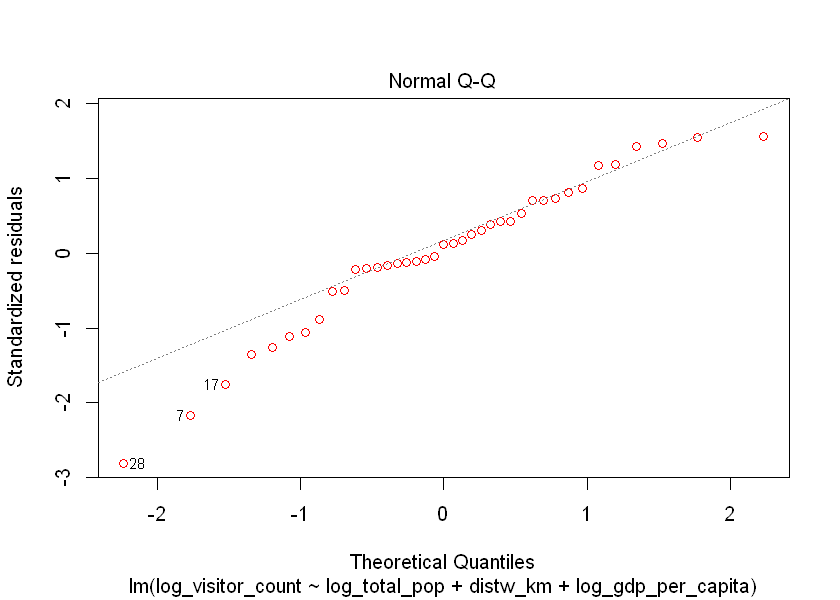

In [11]:
#Normal Q-Q plot

options(repr.plot.width=7, repr.plot.height=5)
plot(final_model, which=2, col=c("red"))

Majority of the residuals follow close to the dotted straight line on the plot, indicating that they are normally distributed. The Q-Q plot does hint at a left skewed distribution (we note that some points at the bottom left are quite off the line). However, with a sample size of n = 40, we may not be able to conclude the distribution of the residuals. 

Overall, for our model, the Q-Q plot shows reasonable alignment to the straight line, suggesting that the residuals are more or less normally distributed. A histogram of the residuals is also plotted below.

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message:
"package 'lindia' was built under R version 3.6.1"

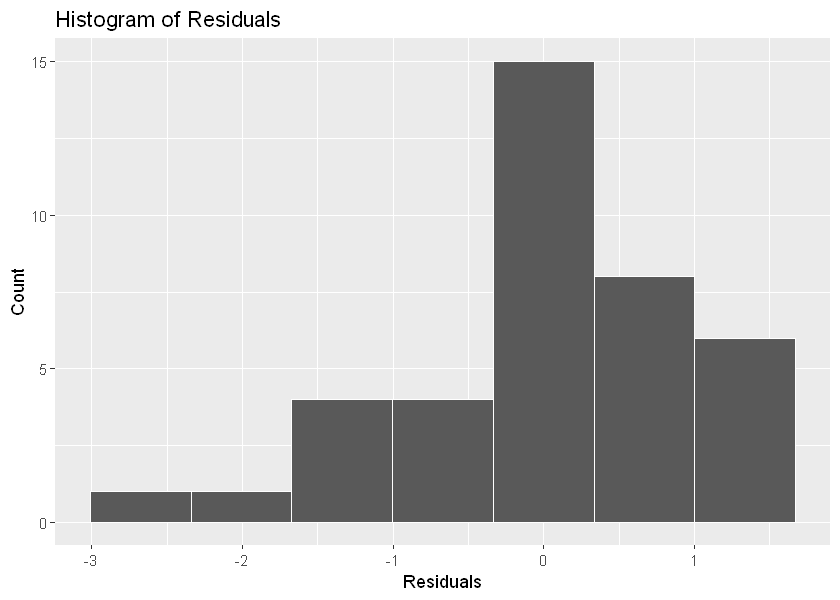

In [12]:
#Plot a histogram of the residuals

library(MASS)
library(ggplot2)
library(lindia)
options(repr.plot.width=7, repr.plot.height=5)
gg_reshist(final_model, bins = 7)

### Spread-location plot
This plot shows if residuals are spread equally along the ranges of predictors and checks for the assumption of homoscedasticity. It is best that the residuals are spread above and below a horizontal line. 

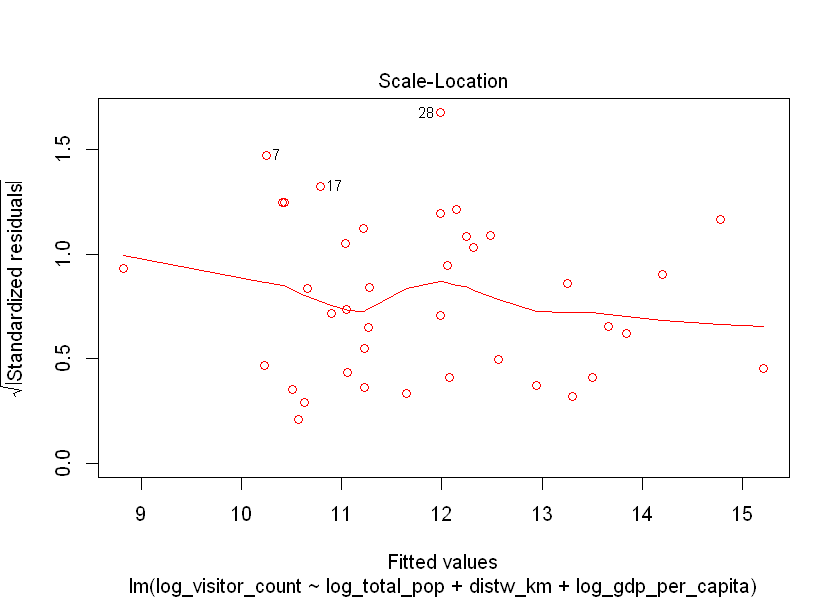

In [13]:
options(repr.plot.width=7, repr.plot.height=5)
plot(final_model, which=3, col=c("red"))

The residuals are reasonably spread above and below a rather horizontal line. 

However, we do note the bump in the middle of the line, perhaps due to the point no. 29 being far above the it.As we only have 39 data points, each residual has a more pronounced effect on the shape of the line as well.

### Residuals vs. Leverage
This plot helps to find influential cases in the data set. An influential case is one that, if removed, will affect the model substantially. Therefore, some consideration should be given on whether to include or exclude it. 

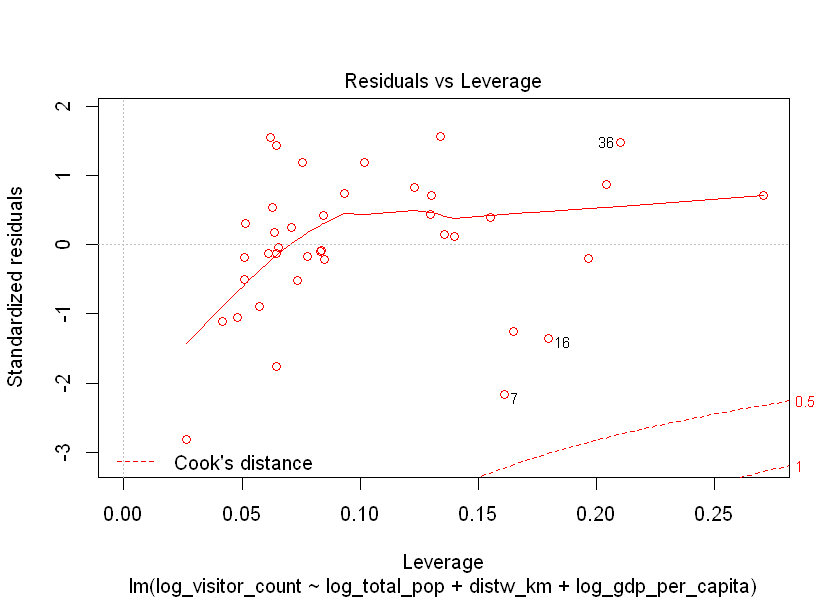

In [14]:
options(repr.plot.width=7, repr.plot.height=5)
plot(final_model, which=5, col=c("red"))

The plot does not reveal any influential cases that can significantly affect the regression model - none of the cases are outside of the Cook's distance. 

## Summary of findings
The stepwise regression model generated can be considered valid based on the diagnostic plots we have conducted. There are four key findings from our analysis. 

1) If a country's total population increases, we can expect more arrivals from that country 

2) If a country's GDP per capital increases, we can expect more arrivals from that country

3) The further a country is from Singapore, the fewer international arrivals we can expect from there

4) Interestingly, sharing a common language was not a statistically significant factor contributing towards international arrivals.


# 3.3 Fixed effects analysis
In this section, we examine the variation across time (2000-2018) within each country. 

We address the following question: “For country X, as its GDP and population change across time from 2000-2018, how does its total visitors to Singapore change?”

The fixed effects model asks this question about every country in the dataset and arrives at an overall conclusion about the relationship between GDP and population with visitor count.

In [15]:
#Load the regression modeling data set 

df_model <- read.csv("df_model_main.csv",stringsAsFactors = FALSE)
head(df_model)

country_code,country,year,visitor_count,total_pop,gdp_per_capita,comm_lang,distw_km
AUS,Australia,2000,510347,19153000,44313.32,1,5893.497
AUS,Australia,2001,550681,19413000,44564.98,1,5893.497
AUS,Australia,2002,538378,19651400,45786.64,1,5893.497
AUS,Australia,2004,561219,20127400,47880.61,1,5893.497
AUS,Australia,2005,620196,20394800,48760.36,1,5893.497
AUS,Australia,2006,691632,20697900,49408.05,1,5893.497


In [16]:
#Perform "natural log" transformation on total arrivals, GDP per capita and total population 

df_model$log_visitor_count = log(df_model$visitor_count)
df_model$log_gdp_per_capita = log(df_model$gdp_per_capita)
df_model$log_total_pop = log(df_model$total_pop)

head(df_model)

country_code,country,year,visitor_count,total_pop,gdp_per_capita,comm_lang,distw_km,log_visitor_count,log_gdp_per_capita,log_total_pop
AUS,Australia,2000,510347,19153000,44313.32,1,5893.497,13.14285,10.69904,16.76797
AUS,Australia,2001,550681,19413000,44564.98,1,5893.497,13.21891,10.70470,16.78145
AUS,Australia,2002,538378,19651400,45786.64,1,5893.497,13.19632,10.73175,16.79366
AUS,Australia,2004,561219,20127400,47880.61,1,5893.497,13.23787,10.77647,16.81759
AUS,Australia,2005,620196,20394800,48760.36,1,5893.497,13.33779,10.79467,16.83079
AUS,Australia,2006,691632,20697900,49408.05,1,5893.497,13.44681,10.80787,16.84554


## Justification for fixed effects analysis
If we were to zoom in to particular countries, the relationship between GDP per capita and Total Visitor Arrivals and between Total Population and Total Visitor Arrivals is very clear. For example, take the case of Vietnam from between 2000-2018. 

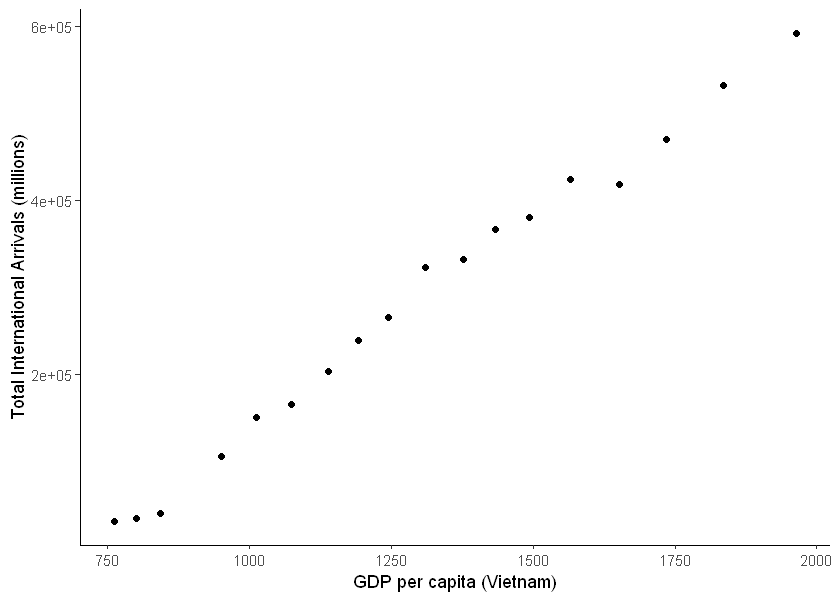

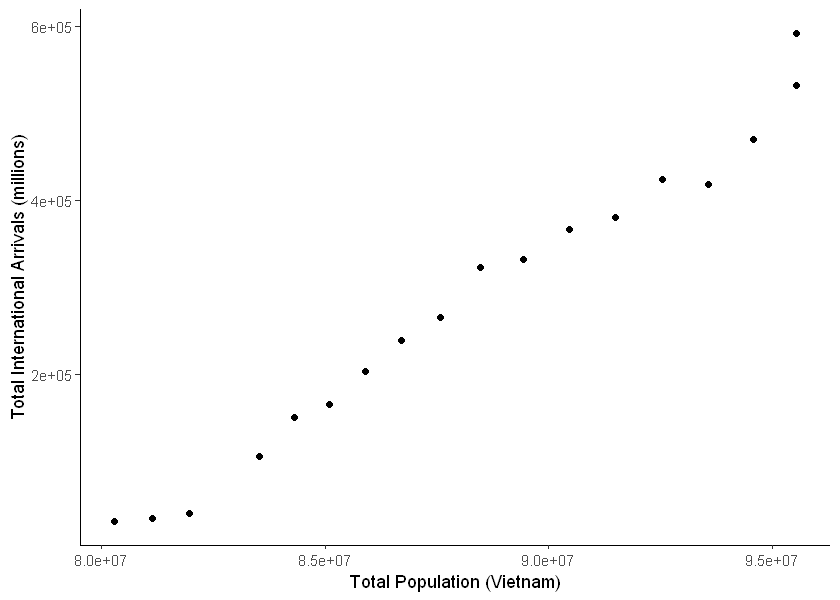

In [17]:
ggplot(df_model[df_model$country=="Vietnam",], 
       aes(x=gdp_per_capita, 
           y=visitor_count)) + 
  geom_point() + 
  labs(x = "GDP per capita (Vietnam)", 
       y="Total International Arrivals (millions)") +
  theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
                     panel.grid.minor = element_blank(), axis.line = element_line(colour = "black"))

ggplot(df_model[df_model$country=="Vietnam",], 
       aes(x=total_pop, y=visitor_count)) +
  geom_point() + 
  labs(x = "Total Population (Vietnam)", 
       y="Total International Arrivals (millions)") +
  theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
                     panel.grid.minor = element_blank(), axis.line = element_line(colour = "black"))

We observe that as GDP per capita and total population in Vietnam increases, the number of international arrivals to Singapore also increases. Thus, a fixed effects model will assist us to sieve out these relationships. 

In [18]:
# This is a country-fixed effects model with our independent variables log GDP per capita and log population on log visitor count

lm.object <- lm(formula = log_visitor_count ~ log_gdp_per_capita + log_total_pop + factor(country), data = df_model)

In [19]:
# Code for the statistical significance of the estimated coefficients, clustering is done at the country level 
summary(lm.object, cluster=c("country"))


Call:
lm(formula = log_visitor_count ~ log_gdp_per_capita + log_total_pop + 
    factor(country), data = df_model)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.29771 -0.11932  0.00571  0.11757  1.22511 

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          -25.71047    1.75879 -14.618  < 2e-16 ***
log_gdp_per_capita                     1.16186    0.05893  19.715  < 2e-16 ***
log_total_pop                          1.58137    0.10496  15.066  < 2e-16 ***
factor(country)Bangladesh             -0.47765    0.36151  -1.321  0.18693    
factor(country)Brunei Darussalam       4.24328    0.42818   9.910  < 2e-16 ***
factor(country)Canada                 -2.88897    0.09638 -29.975  < 2e-16 ***
factor(country)China                  -3.08095    0.49204  -6.262 7.41e-10 ***
factor(country)Denmark                -1.30904    0.16853  -7.768 3.64e-14 ***
factor(country)Egypt                  -4.28659    0.31

### Model interpretation

The fixed effects model above can be interpreted as follows:
 - Holding all else constant, if Total Population increases by 1%, we expect Total Arrivals to increase by 1.58%  
 - Holding all else constant, if GDP per capita increases by 1%, we expect Total Arrivals to increase by 1.16%  
 - There is evidence to infer that log(population), log(GDP per capita) are linearly-related to total arrivals - these coefficients are significant at the 1% level 
 - Effect of population is actually more pronounced in the fixed effects model compared to the cross sectional analysis, so we can expect growth in total population in a country to have a larger effect on total visitors from that country
 - The model can explain around 97.22% of the variation in international arrivals data
 - It is a positive sign that the fixed effects model and the cross sectional analysis corroborate with each other

To run linear regressions, there are some implicit assumptions made. We proceed to check the validity of these assumptions from three aspects:
 - Homoskedasticity 
 - Normality of residuals 
 - Exogeneity and linearity of independent variables 

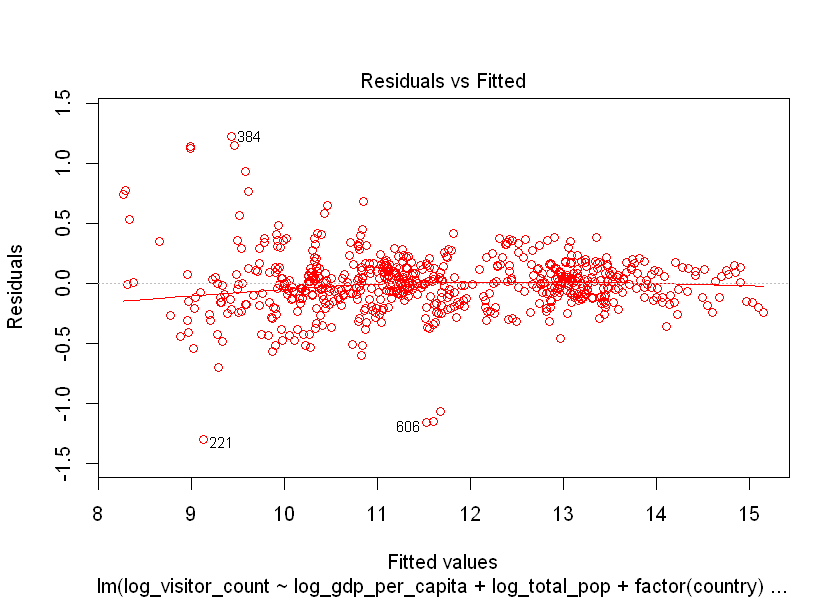

In [20]:
# Plot the residuals against the fitted values to check for homoskedasticity 
options(repr.plot.width=7, repr.plot.height=5)
plot(lm.object, which=1, col=c("red")) 

This certainly shows that most of the residuals do not change drastically as the value of the fitted values change. There is no systematic relationship between the residuals and fitted values, and most of them lie on the horizontal straight line passing through zero. Thus, our assumptions are valid. 

In any case, there is no need to assume homoscedasticity as we have used clustered standard errors with the fixed effects model. This, by definition, allows for heteroscedasticity. 

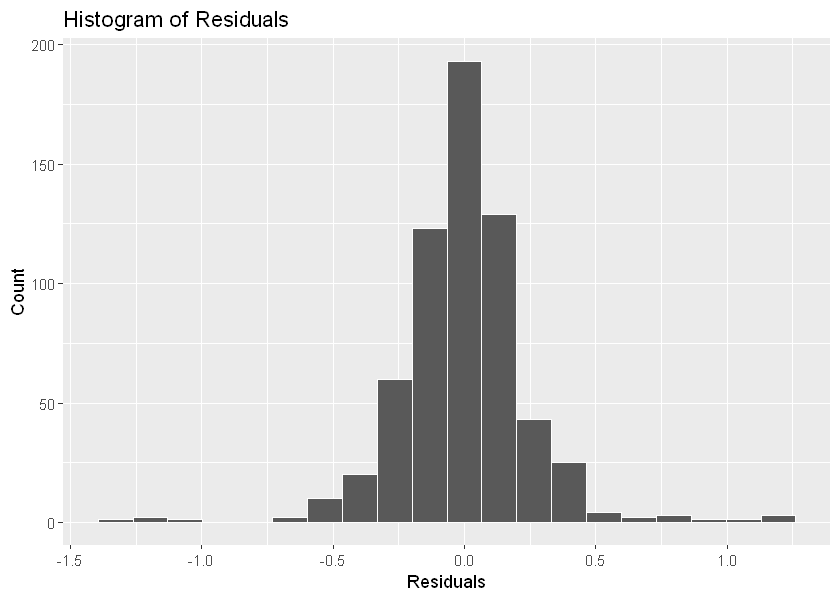

In [22]:
# Plot histogram of residuals
gg_reshist(lm.object,bins=20)

Another key assumption of linear regression is that residuals are normally distributed (and the mean is 0 - which we saw above). The histogram shows that the residuals are distributed much like the standard normal distribution, with the mean at 0. 

In [23]:
# Save values of residuals from fixed effects model
model_res = resid(lm.object)

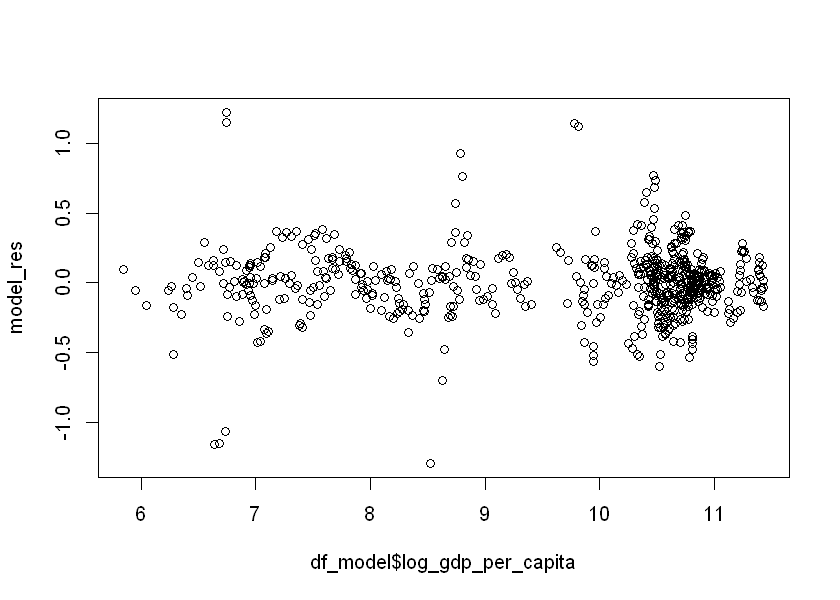

In [24]:
# Plot residuals against log gdp per capita 
plot(df_model$log_gdp_per_capita,model_res)

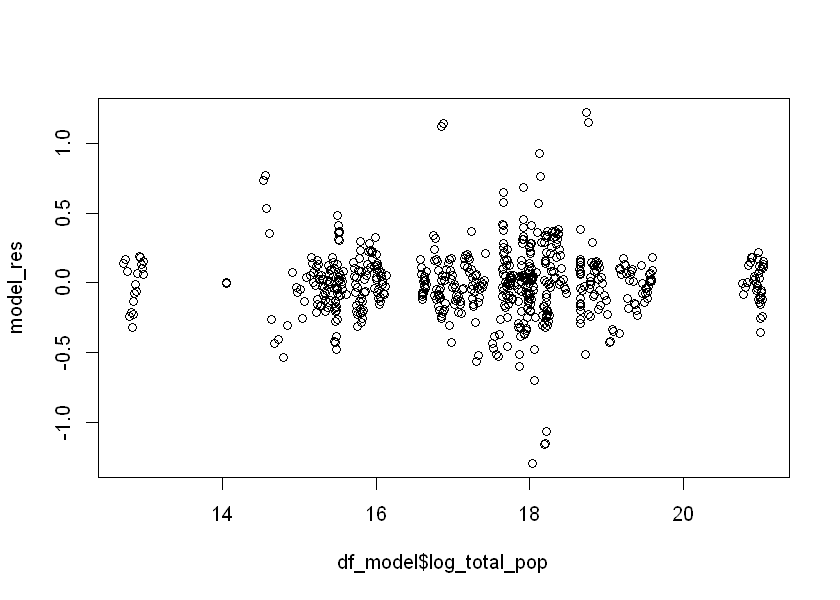

In [25]:
# plot residuals against log total population
plot(df_model$log_total_pop,model_res)

These two graphs show that the residuals are generally not changing as the independent variables change and are rather close to 0. This lends strength to the linear specification between the independent and dependent variables - we specified our model correctly so our residuals look as such.

Furthermore, it also lends strength to the exogeneity assumption. We assumed the independent variables affect the dependent variable in one direction, but not the reverse (ie. total visitor count would affect GDP per capita and Total Population). The plot of the residuals above show that after we control for the independent variables, residuals are close to 0. Hence, the possibility of the other direction where total visitor count affects the independent variables is low as it would mean our residuals would show a relationship with the independent variables, which it does not.

# 4. Conclusion
## General trends analysis - insights
Although international arrival numbers have generally increased between 2000-2018, certain years experienced dips due to adverse events. These events underscore the vulnerability of Singapore's tourism industry to many external shocks, such as health crises, gloomy economic outlook in foreign countries and aviation disasters. To mitigate the detrimental effects of unpredictable events, stakeholders could diversify their sources of international arrivals, and cater to visitors from different countries. Beyond STB's efforts to promote Singapore as a tourist destination, other government agencies and civic communities play a key role in ensuring the 'Little Red Dot' remains attractive to visitors. They include maintaining a resilient healthcare system, political stability and domestic security. 

In recent years, China, Indonesia and India have emerged as the top countries contributing to international arrivals to Singapore. Visitor numbers from China and India have been growing steadily over the period of this study. This presents opportunities for players in the tourism industry to capitalise on. In general, staff should be trained in the appropriate etiquette and languages to better serve a bulk of these guests. Additionally, campaigns and technologies can be adopted to specifically target visitors from China, Indonesia and India. The launch of Alipay in Suntec City is a prime example of catering to Chinese visitors in order to boost tourist receipts. 

Finally, there is a cyclical pattern in arrivals each year. Arrival numbers usually peak in July, slump in September and surge again in December. While we are unable to verify the exact reasons driving this pattern, this insight could inform stakeholders’ decisions. For instance, hotels could better plan their staff allocation, room availability and prices based on these cyclical patterns. They could have more staff available to serve guests during peak periods (July & December) and send them for training during off-peak months (September - October). Utilising such insights from data could help drive more optimal decision-making and resource usage.

## Influential factors analysis - insights
Our conclusions from the regression analysis makes intuitive sense and can be translated into strategies for various players in Singapore's tourism industry. 

As total population and GDP per capita of a country grows, we can expect to see an increase in international arrivals from them. This finding hints at an opportunity to capitalise on the growing size and affluence of the middle class in Asia. It is prudent for STB to focus their marketing efforts on China and Indonesia, and they could consider expending some resources toward our regional neighbours as well (e.g. Vietnam, Thailand). Other stakeholders could consider designing and focusing their offerings to attract visitors from countries in our region. 

Conversely, as a country gets further away from Singapore (geographically), we expect international arrivals to fall. A greater distance between countries implies longer flight durations, potentially more expensive tickets and even transfer flights. All these factors can be rather prohibitive and deter people from visiting. While geographic distances are unlikely to change, advances in air travel could alter the current situation for the better. This could also signal stakeholders to focus less on attracting visitors from countries further away, as the returns may not be commensurate. 

Interestingly, we do not find a significant relationship between sharing a common language with Singapore and international arrivals. It seems that linguistic similarities (at least) are not a major consideration when foreigners decide to visit Singapore. 

## Caveats
This section highlights some shortcomings in the project, as well as how the current analysis can be extended. 

The general trend analysis conducted should be understood as supporting certain explanations and is by no means conclusive. More information can be collected to assess the proposed explanations and obtain a holistic view of international arrivals to Singapore. 

The regression models are unable to entirely account for all factors influencing international arrivals to Singapore. These could include the availability of flights within each country, and external shocks which are challenging to predict. The models may also be limited to Singapore's context and are not generalisable to other jurisdictions. Finally, the regression analyses only cover a select group of countries whose citizens visit the Little Red Dot. 

## Further Analysis
This project focused mainly on deriving insights using quantitative data and some secondary desk research (e.g. online articles). One suggestion could be to supplement the existing analysis with qualitative data from our guests, such as interviews. This form of primary research could help unearth some of the motivations behind why foreigners visit the Lion City. 

Another extension could be to obtain additional data of international arrivals to Singapore, such as their demographic information (e.g. age, gender). As mentioned previously, other variables which may affect international arrivals can be explored in the regression analysis and boost the adjusted R-squared value of the model. 

Finally, another area of study could be to quantify and asses the effects of STB's marketing campaigns or high-profile events on international arrivals to Singapore. For example, to prove the anecdotal statement that "Crazy Rich Asians" and the "Trump-Kim Summit" helped boost international arrival numbers to Singapore.